import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Subset a normalize TPM matrix (B) with hight TPM values 

Made by: Cynthia Soto <br>
Date: June 9th 2021 <br>
Last md: June 10th <br>

**Assumptions:** <br>
**You are working with a normalized TPM-Matrix (type "B") with High TPM values** <br>
We will extract some gene-subsets to get some lists of genes to consult in specialized websites in gene ontologies.  <br>
Ex.TAIR, GO

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3

# graficos embebidos
%matplotlib inline

In [2]:
try:
    # Change the current working Directory to the quantification dir
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
print(os.getcwd())

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion


#### require mathplot_venn library
pip3 install matplotlib_venn <br>
matplotlib-venn-0.11.5
<br>
**Los conjuntos eliminan los elementos duplicados**

### Funtion declarations

In [3]:
# Make a list in an appropiate format for GO query
def make_a_list(lst):
    lst_new = list(lst)
    print(len(lst_new))
    lst_new = print('[' + ', '.join(lst_new) + ']') 
    return lst_new 

In [4]:
###################################################
#             MATRIX B
# Plot the distributions: values are TPM normalized
###################################################

#def df_KDE(df_p, samples, main_t, x_label):
def plot_KDE(df, s_type, samples, title, y_label):  
    ## @df: the array(df) to be plotted (w/o column gene's names)
    ## @s_type: type of matrix A, B, C, D or E
    ## @samples: the names to be displayed in the leyend label
    ## @title: text to be displayed as main-header in the plot
    ## @y_label: text to be displayed in the "y" axis label.

    plt.figure(figsize=(10,7), dpi= 80)
    #plt.style.use('seaborn-whitegrid')
    sns.set_style("whitegrid")
    
    kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)

    for file in samples:
        sample_data = df[file].tolist()
        #print(sample_data[1:10])
        #sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 
        sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 
        
    plt.title(s_type + ': Histogram with KDE for A.thaliana '+ title,fontsize=18);
    plt.xlabel(y_label,fontsize=16);
    plt.ylabel('Probability Density',fontsize=16);
    ## add arbitrary lines to canvas
    #plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
    #plt.plot([0, 15], [.74, .74], 'k-', lw=2, color='red',marker = '*')
    plt.legend(loc='center right',fontsize=15);    
    #plt.savefig("../plots/all_infected_KDE_17zeros_drop.png");
    return

### Subset 1: Control
**Crea la lista de genes en ceros del conjunto de datos de control "Dataset1"**

In [6]:
file="healthy_HighTPM.csv"   #all_infected_geneIDs_with_zeros.csv
df_healthy= pd.read_csv(file, sep='\t', header=0)
df_healthy.head(3)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24,High_TPM
0,AT1G01060,0.304245,0.099684,15.111715,715.291922,600.107458,11.610955,21.151952,14.058188,1
1,AT1G02930,193.382147,349.866962,663.389540,168.106131,140.015973,535.614161,895.976581,700.127165,3
2,AT1G03130,259.568300,312.374286,764.572393,1882.128516,1877.513820,3755.779611,545.136486,2987.598068,5


In [7]:
print(df_healthy.shape)
print(df_healthy.columns)
set1_ctrl = df_healthy['Genes'].to_list()
len(set1_ctrl)
set1_ctrl

(372, 10)
Index(['Genes', 'healthy30.1', 'healthy30', 'healthy12', 'healthy18.1',
       'healthy18', 'healthy24.1', 'healthy12.1', 'healthy24', 'High_TPM'],
      dtype='object')


['AT1G01060',
 'AT1G02930',
 'AT1G03130',
 'AT1G03600',
 'AT1G03680',
 'AT1G05010',
 'AT1G06570',
 'AT1G06680',
 'AT1G07600',
 'AT1G07890',
 'AT1G08380',
 'AT1G09310',
 'AT1G09340',
 'AT1G10960',
 'AT1G11260',
 'AT1G11860',
 'AT1G11910',
 'AT1G12090',
 'AT1G12440',
 'AT1G12900',
 'AT1G13440',
 'AT1G13930',
 'AT1G14880',
 'AT1G15125',
 'AT1G15820',
 'AT1G19570',
 'AT1G19960',
 'AT1G20020',
 'AT1G20340',
 'AT1G20440',
 'AT1G20450',
 'AT1G20620',
 'AT1G21130',
 'AT1G21250',
 'AT1G21680',
 'AT1G21770',
 'AT1G23130',
 'AT1G23310',
 'AT1G27020',
 'AT1G28330',
 'AT1G29395',
 'AT1G29910',
 'AT1G29920',
 'AT1G29930',
 'AT1G30250',
 'AT1G30380',
 'AT1G31330',
 'AT1G31580',
 'AT1G31812',
 'AT1G32060',
 'AT1G32460',
 'AT1G32470',
 'AT1G32900',
 'AT1G35710',
 'AT1G37130',
 'AT1G42970',
 'AT1G44575',
 'AT1G47128',
 'AT1G48300',
 'AT1G51200',
 'AT1G51400',
 'AT1G52230',
 'AT1G52870',
 'AT1G54410',
 'AT1G54780',
 'AT1G55670',
 'AT1G56220',
 'AT1G56280',
 'AT1G59870',
 'AT1G60950',
 'AT1G61520',
 'AT1G

In [8]:
df_stat = df_healthy.describe().T

In [9]:
lst_stat=df_stat['mean'].to_list()
lst_stat.sort()
lst_stat

[4.0,
 1093.6489891302838,
 1127.604755295928,
 1146.2978315046382,
 1247.177945713736,
 1280.2226509196244,
 1303.438358655467,
 1344.0742375432428,
 1384.3324771438558]

### Subset 2: Tratamientos
**Crea la lista de genes en ceros del conjunto de datos de tratamientos "Dataset2"**

In [10]:
file="infected_HighTPM.csv"
df_infec = pd.read_csv(file, sep='\t', header=0)

In [11]:
print(df_infec.shape)
print(df_infec.columns)
set2_infect=df_infec['Genes'].to_list()
len(set2_infect)
set2_infect 

(470, 19)
Index(['Genes', 'Ss30.1', 'Bc12', 'Ch40.2', 'Ch22.2', 'Ch22.1', 'Ch22',
       'Ss30.2', 'Ch22.3', 'Bc12.1', 'Bc24.1', 'Bc18.1', 'Ch40.3', 'Ch40.1',
       'Bc18', 'Bc24', 'Ss30', 'Ch40', 'High_TPM'],
      dtype='object')


['AT1G02500',
 'AT1G02920',
 'AT1G02930',
 'AT1G03130',
 'AT1G03220',
 'AT1G03680',
 'AT1G05010',
 'AT1G06680',
 'AT1G07135',
 'AT1G07600',
 'AT1G07890',
 'AT1G07930',
 'AT1G08380',
 'AT1G08830',
 'AT1G09070',
 'AT1G09310',
 'AT1G09340',
 'AT1G09560',
 'AT1G10140',
 'AT1G11860',
 'AT1G11910',
 'AT1G12900',
 'AT1G13245',
 'AT1G13520',
 'AT1G13930',
 'AT1G14540',
 'AT1G14870',
 'AT1G14880',
 'AT1G15125',
 'AT1G15520',
 'AT1G15625',
 'AT1G15820',
 'AT1G17170',
 'AT1G18300',
 'AT1G19020',
 'AT1G19180',
 'AT1G19570',
 'AT1G19670',
 'AT1G20020',
 'AT1G20340',
 'AT1G20450',
 'AT1G20620',
 'AT1G21130',
 'AT1G21310',
 'AT1G22400',
 'AT1G22410',
 'AT1G23130',
 'AT1G23310',
 'AT1G25220',
 'AT1G25275',
 'AT1G26380',
 'AT1G26390',
 'AT1G27730',
 'AT1G28190',
 'AT1G29910',
 'AT1G29920',
 'AT1G29930',
 'AT1G30250',
 'AT1G30380',
 'AT1G30700',
 'AT1G31330',
 'AT1G31580',
 'AT1G32060',
 'AT1G32350',
 'AT1G32460',
 'AT1G32470',
 'AT1G32920',
 'AT1G33590',
 'AT1G35230',
 'AT1G37130',
 'AT1G42970',
 'AT1G

In [12]:
df_stat = df_infec.describe().T

In [13]:
lst_stat=df_stat['std'].to_list()
lst_stat.sort()
lst_stat

[3.8922619199526625,
 1175.7735847674176,
 1176.2218051336831,
 1231.302241677542,
 1234.5400152412165,
 1407.5595657302906,
 1427.0069386628704,
 1450.9911837509487,
 1453.6059980397404,
 1453.7276235192692,
 1458.379524100874,
 1461.945178362956,
 1570.2135499421877,
 1647.2688246496164,
 1767.989204173891,
 1966.518970236644,
 2237.527860445066,
 2331.924130812035]

### Compración de conjuntos 

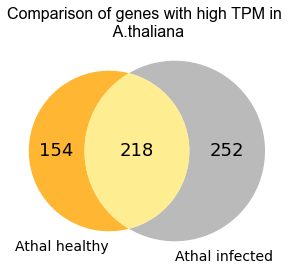

In [15]:
axis_font = {'fontname':'Arial', 'size':'16'}

diagram=venn2([set(set1_ctrl), set(set2_infect)], 
              set_labels = ('Athal healthy', 'Athal infected'),
              set_colors=('orange', 'darkgrey'), alpha = 0.8)

plt.title("Comparison of genes with high TPM in \n A.thaliana", **axis_font)

for t in diagram.set_labels: t.set_fontsize(14)
for t in diagram.subset_labels: t.set_fontsize(18)

plt.show()

### Operaciones lógicas 

In [16]:
# To logical operations data need to be as set dtype
set1_ctrl = set(set1_ctrl)
# set1_ctrl
set2_infect = set(set2_infect)

In [17]:
# Cardinalidad de un conjunto con len().
### print("La cardinalidad del conjunto A.thaliana sana = {0} es {1}".format(set1_ctrl,len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana sana es {0}".format(len(set1_ctrl)))  
print("La cardinalidad del conjunto A.thaliana infectada es {0}".format(len(set2_infect)))  

La cardinalidad del conjunto A.thaliana sana es 372
La cardinalidad del conjunto A.thaliana infectada es 470


In [18]:
# Igualdad
#set1_ctrl == set2_infect

In [19]:
# Subconjunto
# ¿estan los genes del conjunto de infectadas en el conjunto de control?
#set2_infect.issubset(set1_ctrl)

In [20]:
## Subconjunto propio
# set2_infect != set1_ctrl
set2_infect.issubset(set1_ctrl) and set2_infect != set1_ctrl
#               FALSE AND TRUE

False

In [21]:
union=set2_infect.union(set1_ctrl)
len(union)

624

In [22]:
# Intersección de conjuntos
intersec = set2_infect.intersection(set1_ctrl)
lst_GO = make_a_list(intersec)
lst_GO

218
[AT1G15125, AT5G66190, AT1G52230, AT4G39800, AT4G36040, AT2G21660, AT1G02930, AT4G21960, AT1G47128, AT4G35090, AT1G07600, AT3G54890, AT1G05010, AT3G55800, AT2G45180, AT5G20700, AT1G12900, AT5G47110, AT3G26740, AT1G29930, AT3G53420, AT3G60750, AT5G54270, AT1G13930, AT2G13360, AT2G34430, AT5G02500, AT1G64360, AT3G16140, AT3G22231, AT4G17090, AT1G23310, AT2G05520, AT1G44575, AT1G42970, AT1G76180, AT5G60360, AT1G06680, AT3G62410, AT2G22430, AT4G32020, AT1G09310, AT1G72610, AT5G23060, AT1G14880, AT2G14610, AT1G37130, AT2G05380, AT1G51200, AT2G15960, AT1G73885, AT5G25610, AT5G54940, AT1G67865, AT3G63160, AT1G64370, AT1G68010, AT4G02520, AT5G25980, AT4G33010, AT3G10985, AT1G15820, AT3G15353, AT2G41100, AT2G05070, AT2G35370, AT4G39260, AT4G38970, AT5G42300, AT3G08580, AT1G07890, AT2G33830, AT1G70760, AT1G59870, AT1G20020, AT1G31580, AT4G02380, AT4G05180, AT4G16190, AT5G42530, AT3G61470, AT5G21020, AT5G66052, AT1G29910, AT4G36500, AT3G02470, AT2G21330, AT1G67090, AT3G50820, AT5G66570, AT1G6

In [23]:
# Diferencia entre conjuntos
dif_ctrl = set1_ctrl - set2_infect
lst_GO = make_a_list(dif_ctrl)
lst_GO

154
[AT2G15890, AT3G27850, AT5G64260, AT5G24490, AT1G03600, AT1G29395, AT4G15545, AT1G32900, AT1G66200, AT2G28910, AT1G21250, AT5G67030, AT5G13630, AT5G10450, AT1G75460, AT1G28330, AT1G01060, AT1G54780, AT1G72930, AT5G19140, AT5G28840, AT3G63410, AT1G35710, AT3G48740, AT2G31880, AT3G02380, AT2G10940, AT3G16570, AT2G46830, AT3G54500, AT3G22960, AT3G18490, AT4G34870, AT2G46220, AT1G56220, AT3G63140, AT5G10380, AT1G12440, AT4G40040, AT3G56360, AT2G26080, AT3G11630, AT2G29450, AT4G28240, AT2G46600, AT2G30950, AT2G39570, AT3G23000, AT3G27830, AT3G48360, AT1G62180, AT5G61590, AT4G37300, AT1G27020, AT1G62750, AT4G19170, AT1G56280, AT3G61260, AT3G57520, AT1G51400, AT2G38230, AT5G51970, AT4G04020, AT1G13440, AT5G42650, AT3G47340, AT5G14740, AT3G25770, AT4G35750, AT3G51730, AT1G76490, AT1G19960, AT4G08870, AT1G20440, AT4G24770, AT1G21770, AT3G62290, AT4G35770, AT5G19120, AT3G27690, AT5G04140, AT3G22235, AT5G19940, AT5G46110, AT4G34620, AT4G38740, AT5G19240, AT1G64230, AT5G20190, AT3G63540, AT5G1

In [25]:
# estan en infectada pero no el sana
dif_inf = set2_infect - set1_ctrl
lst_GO = make_a_list(dif_inf)
lst_GO

252
[AT5G61160, AT2G45760, AT2G35980, AT1G66700, AT1G52400, AT1G18300, AT1G65690, AT2G31345, AT5G38900, AT4G04480, AT3G16530, AT3G18250, AT2G22500, AT5G22300, AT2G24200, AT1G30700, AT4G39950, AT5G11670, AT5G05730, AT5G07440, AT2G25450, AT3G22600, AT2G29460, AT5G07010, AT1G07135, AT2G38470, AT5G20230, AT2G29470, AT4G34230, AT1G35230, AT2G41180, AT5G06320, AT3G52400, AT1G02920, AT3G60120, AT5G64120, AT1G28190, AT5G16970, AT5G57510, AT5G49480, AT4G16260, AT1G78850, AT5G64310, AT5G17920, AT4G20780, AT4G24350, AT3G22890, AT4G04610, AT5G36970, AT3G02840, AT3G49110, AT2G38870, AT1G65970, AT4G01850, AT3G09440, AT4G34180, AT5G53560, AT2G44790, AT1G10140, AT5G63790, AT1G78830, AT2G45220, AT5G42050, AT4G11280, AT4G20860, AT2G38860, AT4G22690, AT5G40370, AT2G39030, AT3G28210, AT3G49620, AT1G02500, AT2G43590, AT4G13395, AT2G30750, AT1G13245, AT2G46650, AT3G04720, AT5G50760, AT4G36990, AT4G15610, AT2G31570, AT4G12470, AT1G73010, AT3G16470, AT5G22270, AT2G24180, AT5G54810, AT3G57450, AT1G69920, AT2G4

In [26]:
# ## Save the gene IDs with ceros in a file 
# with open("infected_exclusive_geneIDs_in_zero.csv", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in lst_only_infect))

### Visualize distributions on dataset 1 & 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

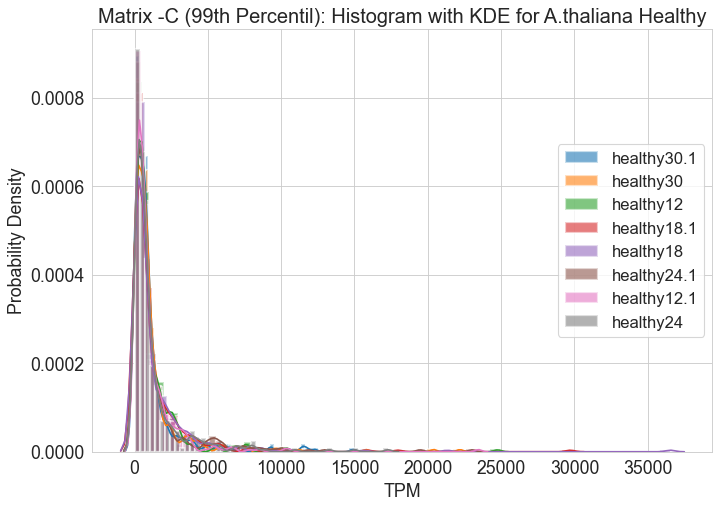

In [27]:
# chk the distribution control
df_plot = df_healthy.drop(['Genes','High_TPM'], axis=1)   #, inplace = True
## Get sample list names
sample_lst=df_plot.columns
sample_lst=sample_lst.to_list()
#print(sample_lst)
plot_KDE(df_plot, 'Matrix -C (99th Percentil)', sample_lst, 'Healthy' , 'TPM')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

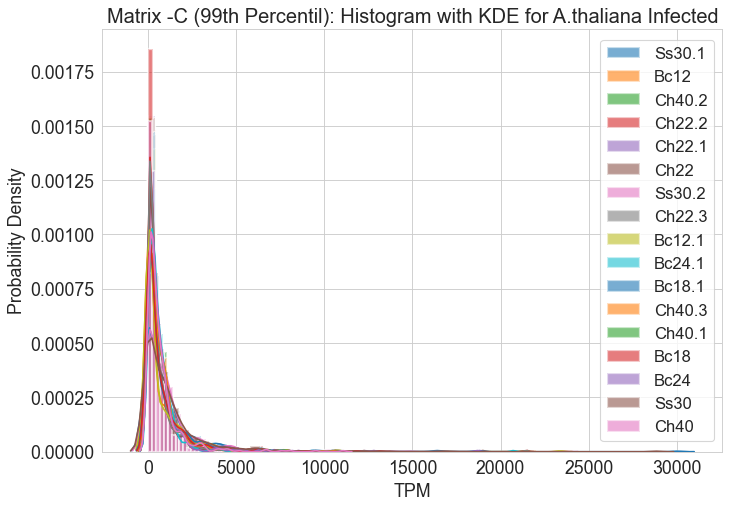

In [28]:
# chk the distribution treatment
df_plot = df_infec.drop(['Genes','High_TPM'], axis=1)   #, inplace = True
## Get sample list names
sample_lst=df_plot.columns
sample_lst=sample_lst.to_list()
#print(sample_lst)
plot_KDE(df_plot, 'Matrix -C (99th Percentil)', sample_lst, 'Infected' , 'TPM')

### Prepare these datasets to be analyzed with WGCNA in R
Basically we will tranform to log2(TMP+1) and perform some stats

### Healthy

In [29]:
df_healthy.head(2)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24,High_TPM
0,AT1G01060,0.304245,0.099684,15.111715,715.291922,600.107458,11.610955,21.151952,14.058188,1
1,AT1G02930,193.382147,349.866962,663.389540,168.106131,140.015973,535.614161,895.976581,700.127165,3


In [30]:
df_healthy.drop(['High_TPM'], axis=1, inplace=True)   #, inplace = True
df_healthy.head(2)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,AT1G01060,0.304245,0.099684,15.111715,715.291922,600.107458,11.610955,21.151952,14.058188
1,AT1G02930,193.382147,349.866962,663.389540,168.106131,140.015973,535.614161,895.976581,700.127165


In [31]:
## Plus 1 to avoid arithmetical error and apply Log2 transformation (avoid error div/0)
for column in df_healthy.select_dtypes(include = [np.number]).columns:
#for column in col_name:
    #print(column)
    df_healthy[column] += 1
    ## Apply Log2 numpy function to absolute values and add a column
    df_healthy[column] = np.log2(df_healthy[column])
df_log = df_healthy
df_log.head(5)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,AT1G01060,0.383215,0.137089,4.010038,9.484404,9.231479,3.656606,4.469362,3.912476
1,AT1G02930,7.602752,8.454780,9.375886,7.401785,7.139715,9.067741,9.808927,9.453532
2,AT1G03130,8.025518,8.291743,9.580395,10.878916,10.875376,11.875281,9.093118,11.545253
3,AT1G03600,8.690933,8.968231,8.871304,9.342536,9.502530,9.096114,8.418457,8.701459
4,AT1G03680,8.677953,8.617633,9.749334,9.540054,9.527760,9.289275,9.854810,9.254974


In [32]:
## save the new matrix filtered of low and extreme high levels
df_log.to_csv('matrix_D_healthyHTPM.csv', sep='\t', index=False)

['healthy30.1', 'healthy30', 'healthy12', 'healthy18.1', 'healthy18', 'healthy24.1', 'healthy12.1', 'healthy24']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

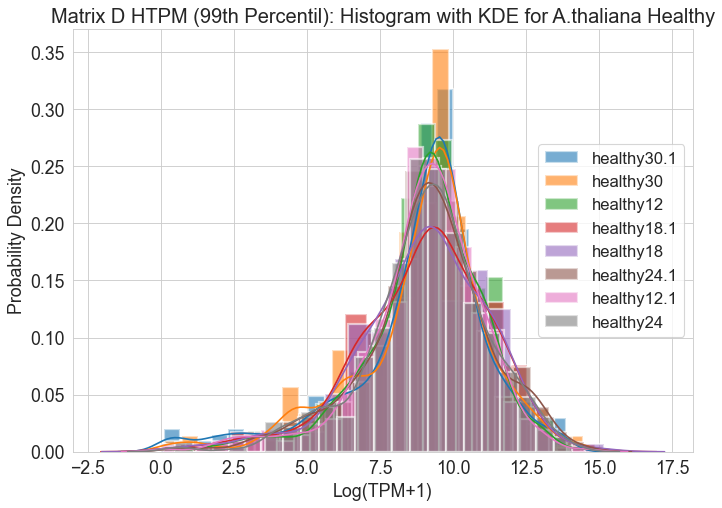

In [33]:
# chk the distribution
df_plot = df_log.drop(['Genes'], axis=1)   #, inplace = True
## Get sample list names
sample_lst=df_plot.columns
sample_lst=sample_lst.to_list()
print(sample_lst)
plot_KDE(df_plot, 'Matrix D HTPM (99th Percentil)', sample_lst, 'Healthy' , 'Log(TPM+1)')

In [203]:
df_stat = df_log.describe().T

In [204]:
lst_stat=df_stat['mean'].to_list()
lst_stat.sort()
lst_stat

[8.807426960622504,
 8.918880890338617,
 8.964575174669996,
 8.986038141619005,
 8.99048748014268,
 9.03703976862793,
 9.076564990691049,
 9.091503590656295]

### Infected

In [34]:
df_infec.head(2)

,Genes,Ss30.1,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ss30.2,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ss30,Ch40,High_TPM
0,AT1G02500,600.992802,341.625073,433.778565,724.679107,636.942047,647.177209,736.991241,716.623866,322.892448,1170.768192,472.206581,436.843581,547.105755,540.689184,1098.169952,644.635286,552.358746,2
1,AT1G02920,9370.595762,49.210866,10852.458640,3507.656012,4883.756755,4871.954790,10108.293434,3494.009311,52.266249,6444.846180,1348.325181,10902.914193,6774.556986,1130.562721,4785.218649,8053.432458,6719.242640,15


In [35]:
df_infec.drop(['High_TPM'], axis=1, inplace=True)   #, inplace = True
df_infec.head(2)

,Genes,Ss30.1,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ss30.2,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ss30,Ch40
0,AT1G02500,600.992802,341.625073,433.778565,724.679107,636.942047,647.177209,736.991241,716.623866,322.892448,1170.768192,472.206581,436.843581,547.105755,540.689184,1098.169952,644.635286,552.358746
1,AT1G02920,9370.595762,49.210866,10852.458640,3507.656012,4883.756755,4871.954790,10108.293434,3494.009311,52.266249,6444.846180,1348.325181,10902.914193,6774.556986,1130.562721,4785.218649,8053.432458,6719.242640


In [36]:
## Plus 1 to avoid arithmetical error and apply Log2 transformation (avoid error div/0)
for column in df_infec.select_dtypes(include = [np.number]).columns:
#for column in col_name:
    #print(column)
    df_infec[column] += 1
    ## Apply Log2 numpy function to absolute values and add a column
    df_infec[column] = np.log2(df_infec[column])
df_logInf = df_infec
df_logInf.head(5)

,Genes,Ss30.1,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ss30.2,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ss30,Ch40
0,AT1G02500,9.233602,8.420487,8.764137,9.503188,9.317282,9.340244,9.527460,9.487084,8.339371,10.194471,8.886326,8.774272,9.098310,9.081321,10.102199,9.334576,9.112071
1,AT1G02920,13.194079,5.649928,13.405867,11.776703,12.254071,12.250581,13.303395,11.771081,5.735150,12.654154,10.398022,13.412558,12.726124,10.144101,12.224671,12.975567,12.714298
2,AT1G02930,13.357685,8.873697,13.364567,12.481824,12.825849,12.847118,13.333033,12.477164,7.879587,12.700439,11.158511,13.364241,12.970137,10.982922,12.334184,13.488204,12.973860
3,AT1G03130,2.634538,8.223064,6.725857,8.699863,9.057217,9.091108,3.810846,8.702250,8.383254,9.512412,10.799961,6.735369,8.011880,10.713400,9.694077,2.480529,8.017124
4,AT1G03220,12.137601,4.195560,10.146788,5.712349,6.393315,6.494962,12.180429,5.742256,4.309026,9.629871,5.377515,10.180014,9.315548,5.107835,9.341343,12.071365,9.293779


In [37]:
## save the new matrix filtered of low and extreme high levels
df_logInf.to_csv('matrix_D_infectedHTPM.csv', sep='\t', index=False)

['Ss30.1', 'Bc12', 'Ch40.2', 'Ch22.2', 'Ch22.1', 'Ch22', 'Ss30.2', 'Ch22.3', 'Bc12.1', 'Bc24.1', 'Bc18.1', 'Ch40.3', 'Ch40.1', 'Bc18', 'Bc24', 'Ss30', 'Ch40']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

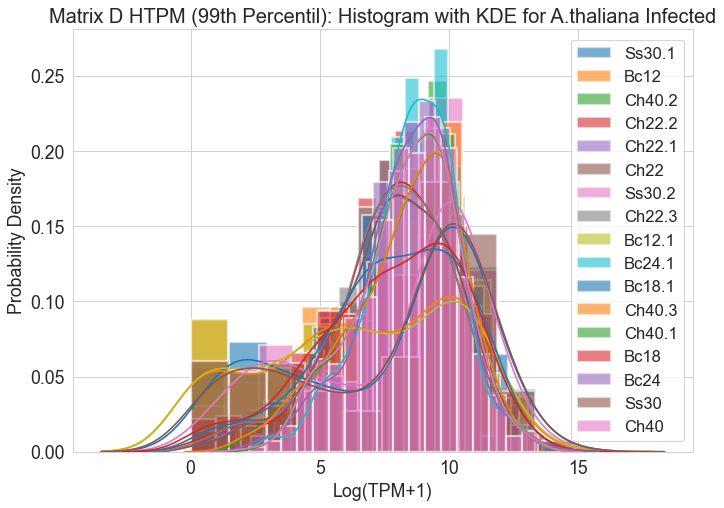

In [38]:
# chk the distribution
df_plot = df_logInf.drop(['Genes'], axis=1)   #, inplace = True
## Get sample list names
sample_lst=df_plot.columns
sample_lst=sample_lst.to_list()
print(sample_lst)
plot_KDE(df_plot, 'Matrix D HTPM (99th Percentil)', sample_lst, 'Infected' , 'Log(TPM+1)')

In [39]:
df_stat = df_logInf.describe().T

In [40]:
lst_stat=df_stat['std'].to_list()
lst_stat.sort()
lst_stat

[1.8057335025557129,
 1.9030555066472348,
 1.93977624295832,
 1.9511484771733343,
 2.209093753595317,
 2.218649774342423,
 2.368719534040718,
 2.3767791370247453,
 2.3915721626164865,
 2.4077394380001724,
 2.7392801229755754,
 2.831958547660227,
 3.4372770191895072,
 3.672997188985851,
 3.7158506998252023,
 3.7301527334800904,
 3.735436034784034]

In [41]:
# drop the most atypical distributions among the dataset
df_logInf.drop(['Ss30.1','Ss30.2','Ss30'], axis='columns', inplace=True)
df_logInf.head(2)

,Genes,Bc12,Ch40.2,Ch22.2,Ch22.1,Ch22,Ch22.3,Bc12.1,Bc24.1,Bc18.1,Ch40.3,Ch40.1,Bc18,Bc24,Ch40
0,AT1G02500,8.420487,8.764137,9.503188,9.317282,9.340244,9.487084,8.339371,10.194471,8.886326,8.774272,9.098310,9.081321,10.102199,9.112071
1,AT1G02920,5.649928,13.405867,11.776703,12.254071,12.250581,11.771081,5.735150,12.654154,10.398022,13.412558,12.726124,10.144101,12.224671,12.714298


['Bc12', 'Ch40.2', 'Ch22.2', 'Ch22.1', 'Ch22', 'Ch22.3', 'Bc12.1', 'Bc24.1', 'Bc18.1', 'Ch40.3', 'Ch40.1', 'Bc18', 'Bc24', 'Ch40']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

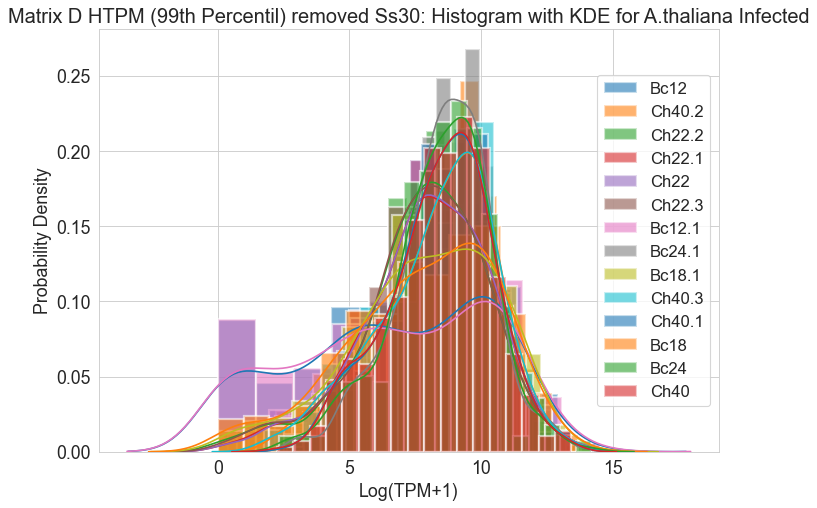

In [42]:
# chk the distribution
df_plot = df_logInf.drop(['Genes'], axis=1)   #, inplace = True
## Get sample list names
sample_lst=df_plot.columns
sample_lst=sample_lst.to_list()
print(sample_lst)
plot_KDE(df_plot, 'Matrix D HTPM (99th Percentil) removed Ss30', sample_lst, 'Infected' , 'Log(TPM+1)')

In [44]:
df_stat = df_logInf.describe().T
lst_stat=df_stat['std'].to_list()
lst_stat.sort()
lst_stat

[1.8057335025557129,
 1.9030555066472348,
 1.93977624295832,
 1.9511484771733343,
 2.209093753595317,
 2.218649774342423,
 2.368719534040718,
 2.3767791370247453,
 2.3915721626164865,
 2.4077394380001724,
 2.7392801229755754,
 2.831958547660227,
 3.672997188985851,
 3.7158506998252023]

In [45]:
## save the new matrix filtered of low and extreme high levels
df_logInf.to_csv('matrix_E_infectedHTPM.csv', sep='\t', index=False)